In [ ]:
!pip install tensorflow
!pip install keras
!pip install opencv-python

**Importing libraries**

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.layers import MaxPooling2D
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Data Preparation**

In [3]:
#creating directories
os.makedirs('/content/drive/My Drive/Xrayimages', exist_ok=True)
!mkdir /content/drive/My\ Drive/Xrayimages/covid
!mkdir /content/drive/My\ Drive/Xrayimages/Non_covid
!mkdir /content/drive/My\ Drive/Xrayimages/Normal

mkdir: cannot create directory ‘/content/drive/My Drive/Xrayimages/covid’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Xrayimages/Non_covid’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Xrayimages/Normal’: File exists


In [34]:
#creating file paths
dir_name = 'content/drive/MyDrive/Xrayimages'
imz_list = glob.glob('../' + dir_name + '/covid/*')
imz_list1 = glob.glob('../' + dir_name + '/Non_covid/*')
imz_list2 = glob.glob('../' + dir_name + '/Normal/*')

In [35]:
#resizingimage
imz_size = (224,224)

In [36]:
list_covid = []
for i in imz_list:
    temp_imz = load_img(i,grayscale=True,target_size=(imz_size))
    temp_imz_array = img_to_array(temp_imz) /255 #image normalization
    list_covid.append(temp_imz_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176) #reshaping images
#creating dataframe
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],0) #adding label

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [38]:
list_ncovid = []
for i in imz_list1:
    temp_imz = load_img(i,grayscale=True,target_size=(imz_size))
    temp_imz_array = img_to_array(temp_imz) /255 #image normalization
    list_ncovid.append(temp_imz_array)
list_ncovid = np.array(list_ncovid)
list_ncovid2 = list_ncovid.reshape(-1,50176) #reshaping images
#creating dataframe
df_ncovid=pd.DataFrame(list_ncovid2)
df_ncovid['label'] = np.full(df_ncovid.shape[0],1) #adding label

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [40]:
list_normal = []
for i in imz_list2:
    temp_imz = load_img(i,grayscale=True,target_size=(imz_size))
    temp_imz_array = img_to_array(temp_imz) /255 #image normalization
    list_normal.append(temp_imz_array)
list_normal = np.array(list_normal)
list_normal2 = list_covid.reshape(-1,50176) #reshaping images
df_normal=pd.DataFrame(list_normal2)
df_normal['label'] = np.full(df_normal.shape[0],2) #adding label

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [ ]:
# Concatenating DataFrames
Df =pd.concat([df_covid, df_ncovid , df_normal], ignore_index=True)

In [41]:
df_normal.shape

(1394, 50177)

In [42]:
temp_imz_array

array([[[0.4509804 ],
        [0.07843138],
        [0.07843138],
        ...,
        [0.05882353],
        [0.05882353],
        [0.06666667]],

       [[0.10196079],
        [0.07843138],
        [0.07450981],
        ...,
        [0.05882353],
        [0.0627451 ],
        [0.06666667]],

       [[0.09019608],
        [0.08235294],
        [0.07450981],
        ...,
        [0.05882353],
        [0.05882353],
        [0.0627451 ]],

       ...,

       [[0.38431373],
        [0.36862746],
        [0.39607844],
        ...,
        [0.5568628 ],
        [0.6901961 ],
        [0.76862746]],

       [[0.43137255],
        [0.4117647 ],
        [0.44313726],
        ...,
        [0.58431375],
        [0.7137255 ],
        [0.78431374]],

       [[0.6156863 ],
        [0.47058824],
        [0.49803922],
        ...,
        [0.6313726 ],
        [0.7490196 ],
        [0.8117647 ]]], dtype=float32)

**Lables for Covid, Non-covid and Normal are: 0, 1 and 2 respectively.**

In [18]:
df_normal['label']

0       2
1       2
2       2
3       2
4       2
       ..
1389    2
1390    2
1391    2
1392    2
1393    2
Name: label, Length: 1394, dtype: int64

**Showing X-rays**

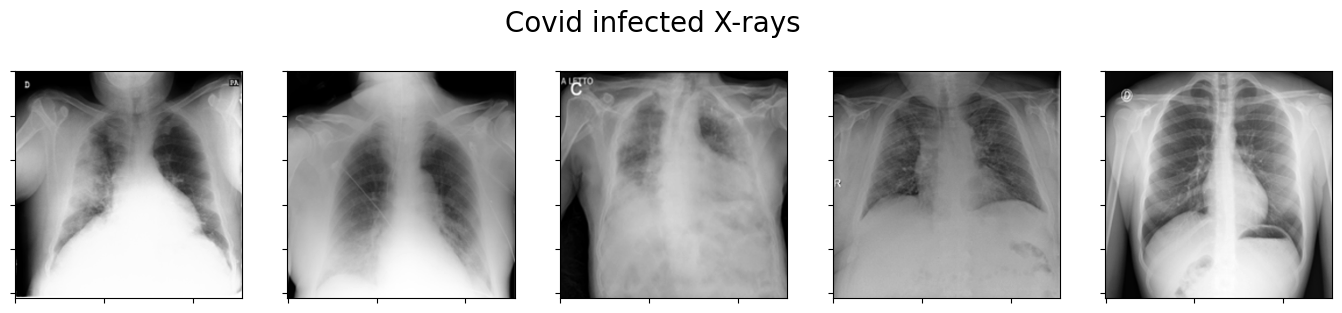

In [45]:
#Covid 19 infected
p = plt.figure(figsize=(17,7))
p.suptitle('Covid infected X-rays',fontsize=20)
p.subplots_adjust(top=1.35)
for i in range(5):
    sp = p.add_subplot(1,5,i+1)
    imz = cv2.imread(imz_list[i], cv2.IMREAD_GRAYSCALE) #reading images
    plt.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=False) #hidingticks
    plt.imshow(imz, cmap='gray')
plt.show()

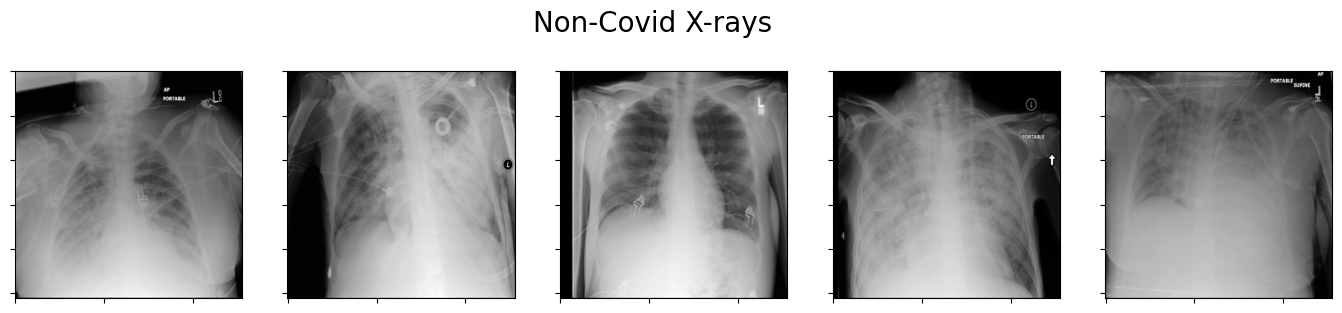

In [46]:
#Covid disinfected
p = plt.figure(figsize=(17,7))
p.suptitle('Non-Covid X-rays',fontsize=20)
p.subplots_adjust(top=1.35)
for i in range(5):
    sp = p.add_subplot(1,5,i+1)
    imz = cv2.imread(imz_list1[i], cv2.IMREAD_GRAYSCALE) #reading images
    plt.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=False) #hidingticks
    plt.imshow(imz, cmap='gray')
plt.show()

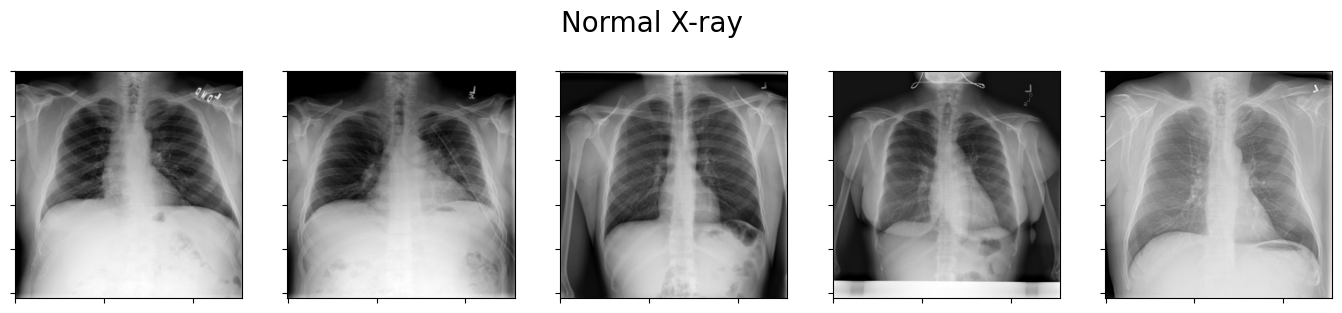

In [47]:
#Normal X-ray
p = plt.figure(figsize=(17,7))
p.suptitle('Normal X-rays',fontsize=20)
p.subplots_adjust(top=1.35)
for i in range(5):
    sp = p.add_subplot(1,5,i+1)
    imz = cv2.imread(imz_list2[i], cv2.IMREAD_GRAYSCALE) #reading images
    plt.tick_params(labelleft=False, labelright=False, labeltop=False, labelbottom=False) #hidingticks
    plt.imshow(imz, cmap='gray')
plt.show()

**Observation:**
1. Severe lung congestion in X-rays of Covid infected people.
2. Small amount of lung congestion on Covid disinfected X-rays.
3. Clear lungs are seen in normal X-rays.



**CNN Model**

In [88]:
#Created 4 layered CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,1))) #32 filters
model.add(Conv2D(64,kernel_size=(3,3), activation='relu')) #standard kernel size
model.add(MaxPooling2D(pool_size=(2,2))) #standard pool size
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #tofindoverfitting

model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(516,kernel_size=(3,3), activation='relu'))  #number of channels needs to be increased as we go deeper into the model
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#adding dense layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

In [49]:
#model compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
print(model.layers[0].input_shape)

(None, 224, 224, 1)


In [90]:
print(model.layers[-1].output_shape)

(None, 3)


In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 110, 110, 64)      0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 110, 110, 64)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

**Observation:**
1. After the first convolution input shape is reduced to 222x222x32
2. Before the dense layer it is 5x5x516

**Train -Test Split**

In [92]:
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=32)
#reshaping the data
X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
#converting to OHE vectors
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [93]:
#Shapes of training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (3328, 224, 224, 1)
X_test shape: (833, 224, 224, 1)
y_train shape: (3328, 3)
y_test shape: (833, 3)


**Model Evaluation**

In [94]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
test_y = np.argmax(Y_test, axis=1)
cm = metrics.confusion_matrix(test_y, pred)
labels = ['Covid', 'Non_covid', 'Normal']

27/27 [==============================] - 66s 2s/step


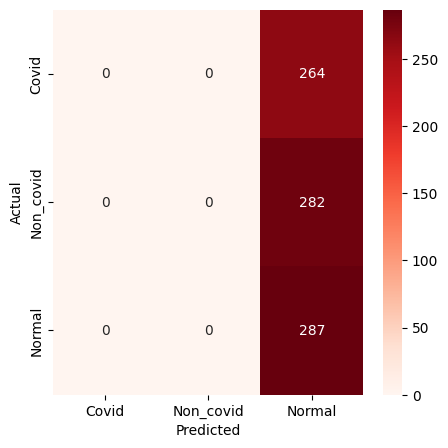

In [95]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [86]:
print(classification_report(test_y, pred))
print('Covid= 0, Non_covid= 1, Normal= 2')

              precision    recall  f1-score   support

           0       0.32      1.00      0.48       264
           1       0.00      0.00      0.00       282
           2       0.00      0.00      0.00       287

    accuracy                           0.32       833
   macro avg       0.11      0.33      0.16       833
weighted avg       0.10      0.32      0.15       833

Covid= 0, Non_covid= 1, Normal= 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
